### 1. k-means on digits

Use K-means clustering on the MNIST dataset (which can be imported with `from sklearn.datasets import load_digits`) to learn to identify the 10 digits in an unsupervised manner.

1. Plot the `cluster_centers_` from a kmeans clustering (which should be shape `(10,64)`) onto a `8x8` grid (hint: use `kmeans.cluster_centers_.reshape`)

2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label (eg. if the digit 4 has the cluster label 9, you want to remap it to 4). Hint: You can use the statistical mode of your clusters and the real label to match them

3. Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.

4. Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.

In [1]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
sns.set()

#load data
from sklearn.datasets import load_digits

#check shape
digits = load_digits()
digits.data.shape


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


(1797, 64)

In [2]:
#cluster the digit data
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

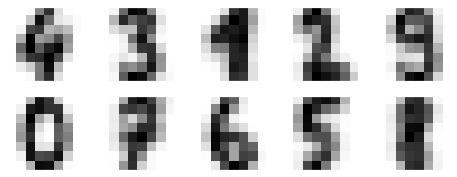

In [3]:
#have a look at the cluster centres
#Q1. reshape on an  8 x 8 grid
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [4]:
#Q.2 Ensure that labels and digits match correctly
#by matching learned and true cluster labels

#This requires importing scipy.stats first
from scipy.stats import mode

#then matching the label masks
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

#and finally, checking the accuracy score
#Q.3.a checking the accuracy score - step one
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.7952142459654981

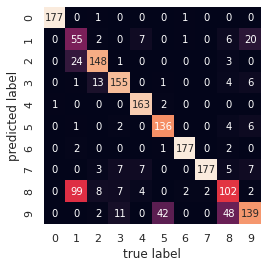

In [5]:
#Q.3.b Using the confusion_matrix for further verification

#first import the confusion matrix library 
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [6]:
"""Use the Fowlkes-Mallows score to evaluate your clustering against the true labels.
 Give a two paragraph interpretation comparing to your result in #3."""
#Q.4 import Fowlkes-Mallows

from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(digits.target, labels)

0.7041643183491655

In [7]:
#explanation for FMS
#The Fowlkes-Mallows index (FMI) is defined as the geometric mean between of the precision and recall:
"""The Fowlkes-Mallows index (FMI) is defined as the geometric mean between of the precision and recall:

FMI = TP / sqrt((TP + FP) * (TP + FN))
Where TP is the number of True Positive (i.e. the number of pair of points that belongs in the same clusters in both labels_true and labels_pred), FP is the number of False Positive (i.e. the number of pair of points that belongs in the same clusters in labels_true and not in labels_pred) and FN is the number of False Negative (i.e the number of pair of points that belongs in the same clusters in labels_pred and not in labels_True).

The score ranges from 0 to 1. A high value indicates a good similarity between two clusters."""

'The Fowlkes-Mallows index (FMI) is defined as the geometric mean between of the precision and recall:\n\nFMI = TP / sqrt((TP + FP) * (TP + FN))\nWhere TP is the number of True Positive (i.e. the number of pair of points that belongs in the same clusters in both labels_true and labels_pred), FP is the number of False Positive (i.e. the number of pair of points that belongs in the same clusters in labels_true and not in labels_pred) and FN is the number of False Negative (i.e the number of pair of points that belongs in the same clusters in labels_pred and not in labels_True).\n\nThe score ranges from 0 to 1. A high value indicates a good similarity between two clusters.'

### 2: Image Compression second pass

Use any the clustering algorithms we see to produce what you think is the best image compression ratio that is **visually indistinguishable** from the original image (recall in the lecture the result was very compressed but also much uglier)

Justify your choice and process in 3 paragraphs.

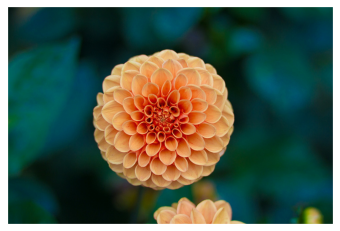

In [8]:
#import one of the 2 images in the sklearn dataset - this time the flower

import PIL
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [9]:
#check the shape
flower.shape

(427, 640, 3)

In [10]:
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [11]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

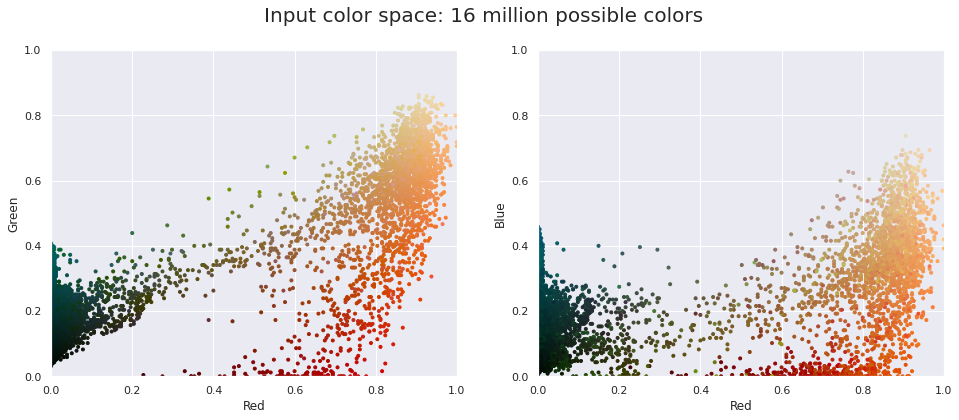

In [12]:
plot_pixels(data, title='Input color space: 16 million possible colors')

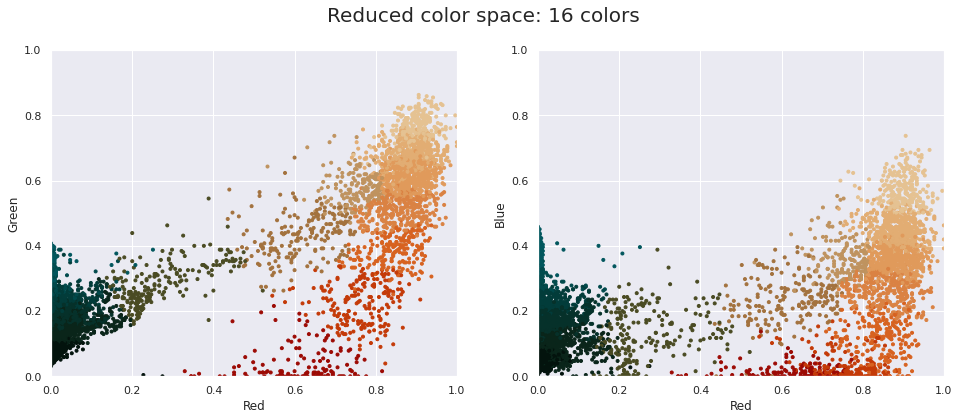

In [13]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
#kmeans = MiniBatchKMeans(N_COLORS)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

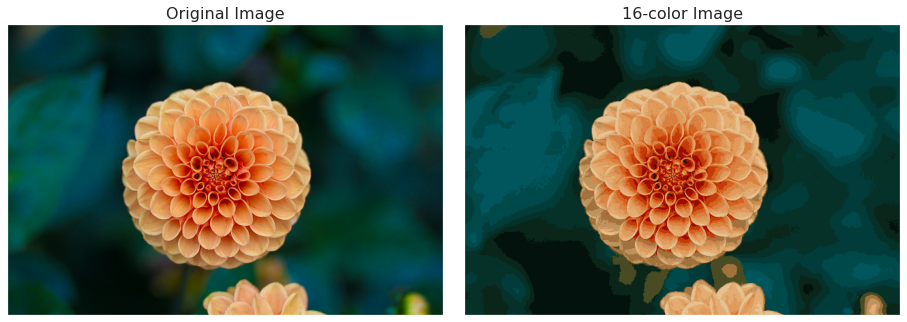

In [14]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

In [15]:
"""Doing a colorspace analysis with this RGB model 
and then the Kmeans minibatch recolorization allows me to reduce the
possibility of 16 million colors to only 16, providing
a great compression rate + display efficiency.

While there is a reduction in quality, if this is not a high-quality
branding usage of the image or if its only likely to be displayed
on small screens as an intaglio, the speed at which it will render
will largely compensate for the loss of definition."""

'Doing a colorspace analysis with this RGB model \nand then the Kmeans minibatch recolorization allows me to reduce the\npossibility of 16 million colors to only 16, providing\na great compression rate + display efficiency.\n\nWhile there is a reduction in quality, if this is not a high-quality\nbranding usage of the image or if its only likely to be displayed\non small screens as an intaglio, the speed at which it will render\nwill largely compensate for the loss of definition.'

# 3. Clustering on Colleges

This question will use the data from `college.csv`

1. Use clustering with `k=2` on all data except whether the college is private of not. Try to match it best to the private/public college split (hint: don't forget to normalize your features!). Evaluate it in terms of classification metrics and clustering metrics.

2. Knowing what you found in `3.1`, find the best overall clustering with the k of your choice. Make an argument and a visualization of the clusters (with two relevant statistics) to demonstrate why you think your clustering is good.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
sns.set()

In [18]:
#load data
uni = pd.read_csv("/content/drive/MyDrive/4-3-clustering/data/college.csv")

In [19]:
uni.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [20]:
uni.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [21]:
uni.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [22]:
#normalizing the data

#A. dropping the Name column
uni.drop(['Unnamed: 0'], axis=1, inplace=True)


#B.Graduation rate and PhD exceed 100% = need to be normalized
from sklearn import preprocessing
uni['Grad.Rate'] = np.clip(uni['Grad.Rate'].values, a_min=None, a_max=100)
uni['PhD'] = np.clip(uni['PhD'].values, a_min=None, a_max=100)
uni.describe()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.656371,79.702703,14.089704,22.743887,9660.171171,65.440154
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.321324,14.722359,3.958349,12.391801,5221.768440,17.118804
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


In [23]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [24]:
#Generate clusters
from sklearn.cluster import KMeans
#Q1: create an instance with 2 clusters
kmeans = KMeans(2)

#Fit the data to all the values except the Private column (Yes/No)
kmeans.fit(uni.drop(['Private'], axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
#check centers to see how this is going
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04379671e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [26]:
#Q.1.3 Evaluate in terms of classification metrics

#To enable evaluation without sacrificing the Private/Public split,
#attribute category codes to the Yes/No column classification

uni['Private'] = uni.Private.astype("category").cat.codes

#view resulting column
uni.Private


0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private, Length: 777, dtype: int8

In [27]:
#Check table for resulting integration
uni.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [28]:
#With this step taken, we can now generate a label array
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
# Create a confusion matrix to evaluate classification without labels
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(uni.Private, kmeans.labels_))
print(classification_report(uni.Private, kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [30]:
#Now check the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix

print(pd.DataFrame(classification_report(uni.Private, kmeans.labels_, output_dict=True)))

                    0           1  accuracy   macro avg  weighted avg
precision    0.206278    0.314815  0.221364    0.260546      0.285201
recall       0.650943    0.060177  0.221364    0.355560      0.221364
f1-score     0.313280    0.101040  0.221364    0.207160      0.158949
support    212.000000  565.000000  0.221364  777.000000    777.000000


In [31]:
#Scaling the data : how does Scaling change results?
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = uni.drop('Private', axis=1)
y = uni.Private

X = scaler.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))


[[ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81998076
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60419735]
 [-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49097613
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.36177249]]
0.5225225225225225
[[ 66 146]
 [225 340]]
              precision    recall  f1-score   support

           0       0.23      0.31      0.26       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777



In [32]:
#What happens if I change the K value?
#starting with 5
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = uni.drop('Private', axis=1)
y = uni.Private

X = scaler.fit_transform(X)

kmeans = KMeans(5)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[ 0.46365148  0.09529123 -0.0311731   1.92233208  1.56725394 -0.16345773
  -0.4400116   1.80468249  1.19841125  0.30359401 -0.48398918  1.14883054
   1.09785159 -1.21712489  1.38281465  2.103702    1.16101986]
 [ 0.45097343  0.52803869  0.77173023 -0.47586719 -0.28988093  0.89424082
   0.96752346 -0.93416797 -0.59082935  0.11597638  0.83305007  0.29539938
   0.33009301  0.88523698 -0.82309298 -0.48355914 -0.7558945 ]
 [-0.31273651 -0.27729572 -0.35397533  0.17873242  0.27014625 -0.38618941
  -0.29688654  0.4900875   0.40965963 -0.09502517 -0.33340978  0.34311335
   0.37209949 -0.25448325  0.42321488  0.06033768  0.49483357]
 [ 2.74427373  2.89342229  2.8650196   0.66406157  0.80115118  2.84777842
   1.43764892 -0.3105305   0.16498369  0.30121792  0.50352762  0.84310869
   0.80668941  0.46330565 -0.38966309  0.18271121  0.08759878]
 [-0.52061938 -0.51243504 -0.50289037 -0.63140527 -0.72769708 -0.48438133
  -0.26950465 -0.52632432 -0.51303121 -0.09790471  0.00804464 -0.94574577
  -0.968

In [33]:
#With 5 as K, accuracy went down considerably. Let's try 4 instead
scaler = StandardScaler()

X = uni.drop('Private', axis=1)
y = uni.Private

X = scaler.fit_transform(X)

kmeans = KMeans(4)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[-0.31282422 -0.28164254 -0.36078558  0.1812971   0.2790542  -0.38777365
  -0.29148034  0.48596994  0.40434442 -0.08654946 -0.33904767  0.32077515
   0.35524416 -0.26466271  0.44874896  0.06042092  0.49578476]
 [ 1.77429462  1.9706657   2.16110039  0.17167997  0.36932692  2.23104697
   1.56067285 -0.57376651 -0.19640721  0.34849907  0.91890232  0.67133433
   0.66517622  0.6095756  -0.5840884  -0.08747898 -0.37520218]
 [-0.36862541 -0.35800162 -0.32070633 -0.63815006 -0.68643651 -0.28740644
  -0.10737757 -0.63696275 -0.54310018 -0.09030499  0.12408913 -0.70681765
  -0.72219376  0.32118232 -0.49856599 -0.50505804 -0.55787541]
 [ 0.54016607  0.14501056  0.02579116  1.94999651  1.57852977 -0.11105628
  -0.41699737  1.79044913  1.2041349   0.27215159 -0.48040303  1.15329357
   1.10768901 -1.22525039  1.32737112  2.10616047  1.16762229]]
0.032175032175032175
[[ 14  83 113   2]
 [255  11 224  75]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

  

In [34]:
#With 5 as K, accuracy went down considerably. Let's try 6 instead
scaler = StandardScaler()

X = uni.drop('Private', axis=1)
y = uni.Private

X = scaler.fit_transform(X)

kmeans = KMeans(6)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[-5.53842080e-01 -5.48878543e-01 -5.61157447e-01 -6.12043153e-01
  -7.25517722e-01 -5.34795720e-01 -3.22765681e-01 -3.49619343e-01
  -3.99962905e-01 -4.40632735e-02  1.31599586e-03 -1.21281461e+00
  -1.19125700e+00 -1.54027455e-01 -3.14494155e-01 -4.08804217e-01
  -3.64109059e-01]
 [ 4.73866224e-01  1.07351694e-01 -9.84494941e-03  1.94262967e+00
   1.57524891e+00 -1.48399349e-01 -4.36015435e-01  1.76848015e+00
   1.18380104e+00  3.18983806e-01 -4.81093992e-01  1.14931246e+00
   1.09444856e+00 -1.18421251e+00  1.37561168e+00  2.08039006e+00
   1.14940319e+00]
 [-3.16785499e-01 -2.81563725e-01 -3.58488447e-01  1.91069418e-01
   2.89912750e-01 -3.88607362e-01 -3.00812445e-01  4.91536976e-01
   4.01751602e-01 -9.45937117e-02 -3.34431652e-01  3.47891716e-01
   3.74161211e-01 -2.64580305e-01  4.65430161e-01  5.34951740e-02
   4.90905605e-01]
 [ 1.01267289e+00  1.21903048e+00  1.53504143e+00 -2.10452765e-01
  -1.11608678e-02  1.67595739e+00  1.75948656e+00 -7.06702326e-01
  -3.78884370e-01  

In [35]:
#K=4 is the best factor, although nose of them are great : )

In [36]:
#Question 2

In [37]:
uni2 = uni
uni2['Acceptperc'] = uni['Accept'] / uni['Apps']
uni2['Enrollperc'] = uni['Enroll'] / uni['Accept']
uni2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acceptperc,Enrollperc
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169,0.585227
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146,0.266112
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207,0.306290
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930,0.392550
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477,0.376712


In [38]:
uni2.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acceptperc,Enrollperc
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.656371,79.702703,14.089704,22.743887,9660.171171,65.440154,0.746928,0.412015
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.321324,14.722359,3.958349,12.391801,5221.768440,17.118804,0.147104,0.133989
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000,0.154486,0.099754
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.000000,0.675647,0.317204
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.000000,0.778750,0.387419
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.000000,0.848522,0.485674
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,100.000000,1.000000,1.000000


In [39]:
#Choosing the best number of clusters to use can be achieved by using the elbow method
#https://www.kaggle.com/ellecf/visualizing-multidimensional-clusters

inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(uni2)
    kmeanModel.fit(uni2)
    inertia.append(kmeanModel.inertia_)

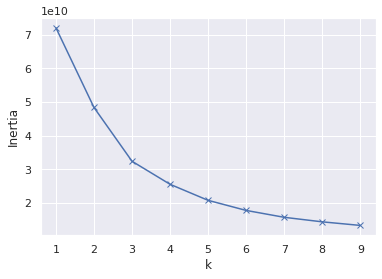

In [40]:
#Elbow plot = looking for the pivot point in the line
#and then using this for the cluster number
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

#to me, it looks like there are pivots at 3 and 5

In [41]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=4).fit(uni2)
    kmeanModel.fit(uni2)
    inertia.append(kmeanModel.inertia_)

In [42]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.7/dist-packages (5.5.5)


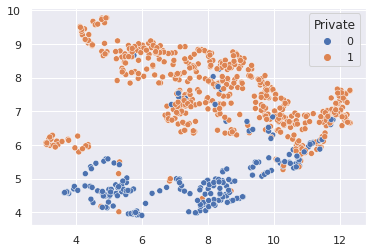

In [45]:
import umap

ump = umap.UMAP(n_components=4, n_neighbors=5)
x2 = ump.fit_transform(X)
sns.scatterplot(x2[:, 0], x2[:, 1], hue=y)

In [ ]:
#Using a silhouette analysis to see how my assumption of 4 being the correct factor runs

#RESULTS: show that setting n_components at 4 produces clear groupings
#within a range of 0 to 3, with quite a regular vertical silhouette line.

Use the Fowlkes-Mallows score to evaluate your clustering against the true labels.
 Give a two paragraph interpretation comparing to your result in #3.
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


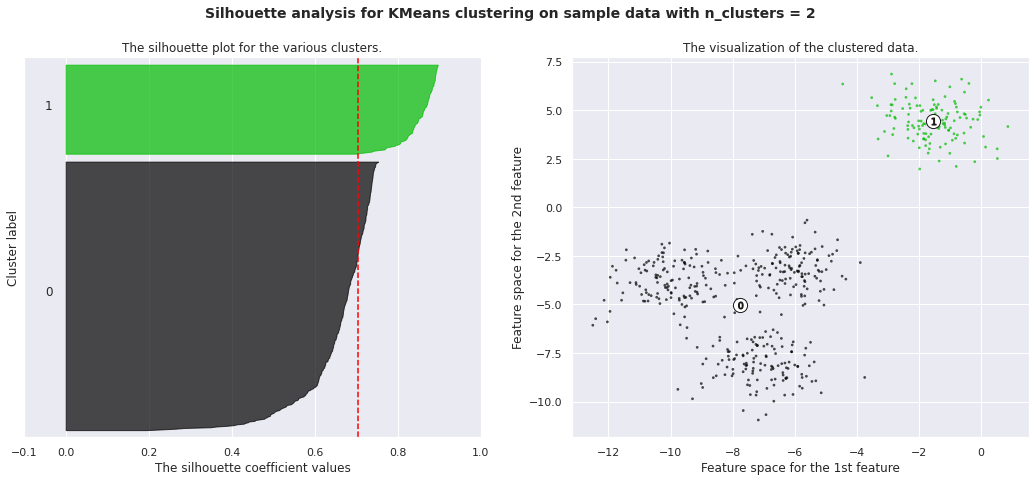

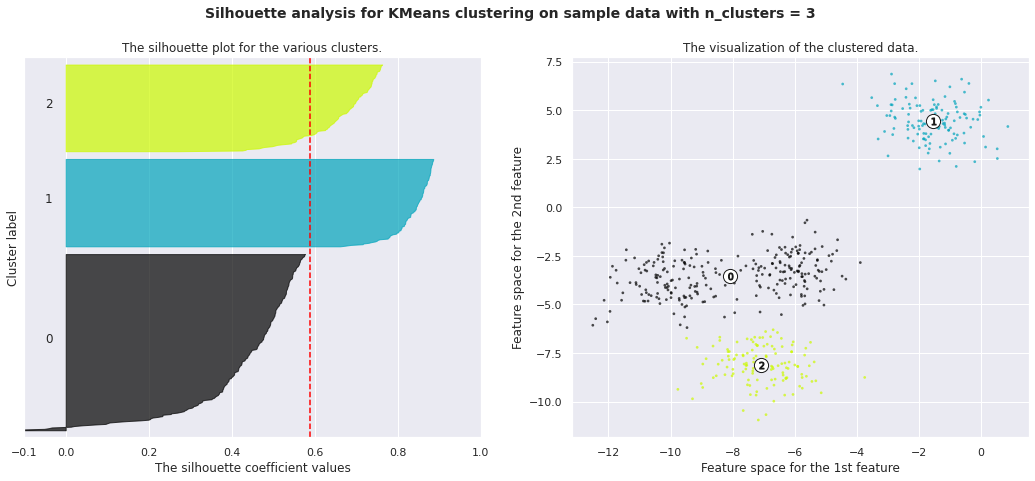

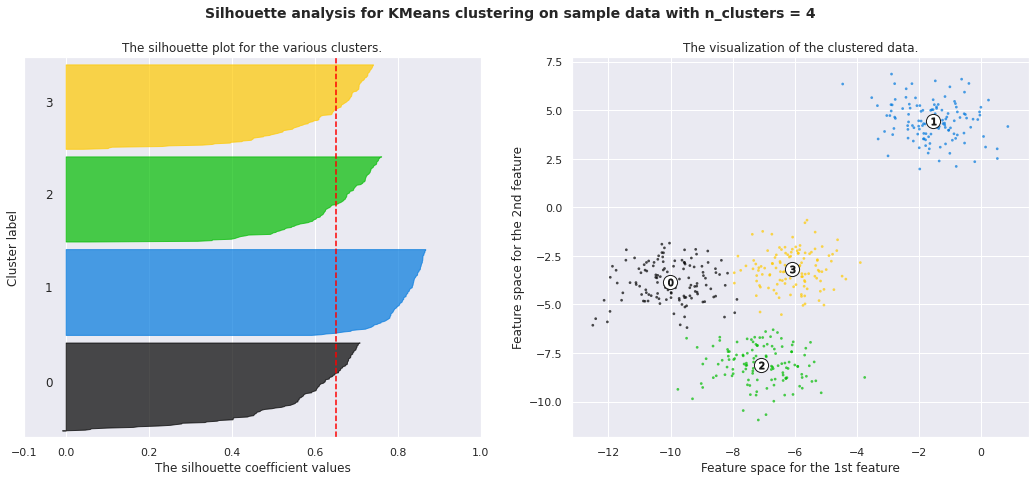

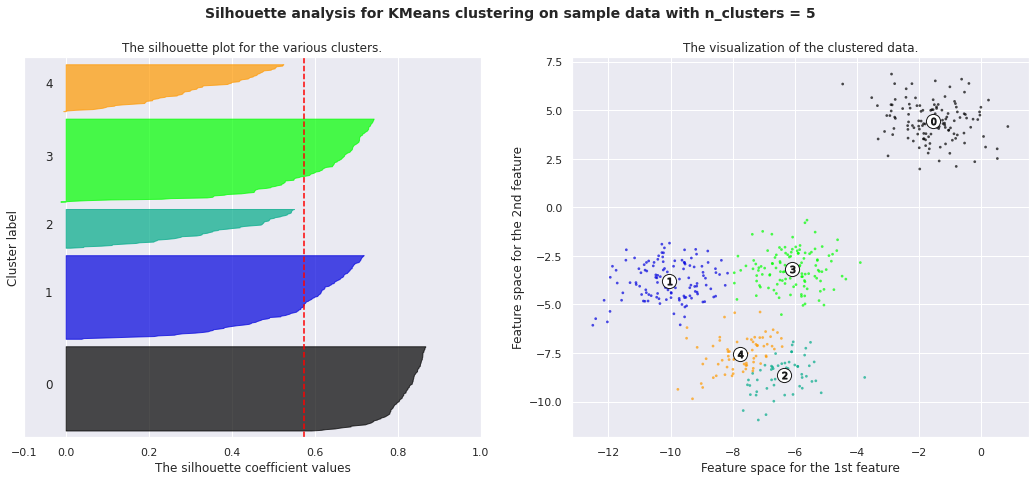

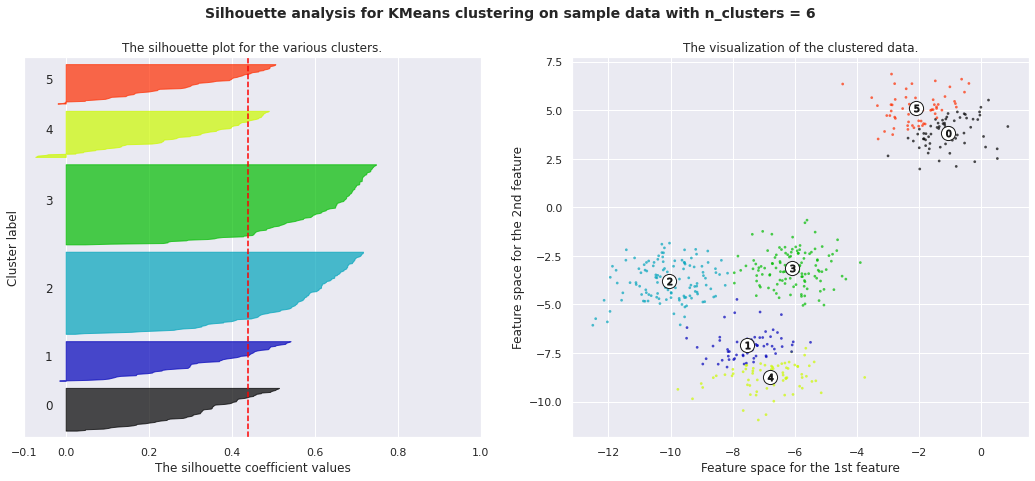

In [62]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()